#### Project 4

In [1]:
# uv export --no-hashes > requirements.txt
print("notebook ok")

notebook ok


In [2]:
from research_and_analyst.utils.model_loader import ModelLoader

In [3]:
model_loader = ModelLoader()

{"timestamp": "2025-10-12T06:51:35.940675Z", "level": "info", "event": "GOOGLE_API_KEY loaded from environment"}
{"timestamp": "2025-10-12T06:51:35.949888Z", "level": "info", "event": "GROQ_API_KEY loaded from environment"}
{"timestamp": "2025-10-12T06:51:35.956700Z", "level": "warning", "event": "ASTRA_DB_API_ENDPOINT is missing from environment"}
{"timestamp": "2025-10-12T06:51:35.964745Z", "level": "warning", "event": "ASTRA_DB_APPLICATION_TOKEN is missing from environment"}
{"timestamp": "2025-10-12T06:51:35.974621Z", "level": "warning", "event": "ASTRA_DB_KEYSPACE is missing from environment"}
{"config_keys": ["astra_db", "embedding_model", "retriever", "llm"], "timestamp": "2025-10-12T06:51:35.995544Z", "level": "info", "event": "YAML config loaded"}


In [4]:
llm = model_loader.load_llm()

{"provider": "groq", "model": "llama-3.3-70b-versatile", "timestamp": "2025-10-12T06:51:39.115959Z", "level": "info", "event": "Loading LLM"}


In [5]:
llm.invoke("Hello, how are you?")

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


AIMessage(content="Hello. I'm just a language model, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to assist you with any questions or tasks you may have. How can I help you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 41, 'total_tokens': 89, 'completion_time': 0.097114962, 'prompt_time': 0.00213851, 'queue_time': 0.09321595, 'total_time': 0.099253472}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_9e1e8f8435', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--a9601c56-9559-4bea-8e6a-639b82f9d6c4-0', usage_metadata={'input_tokens': 41, 'output_tokens': 48, 'total_tokens': 89})

In [6]:
from typing import List
from typing_extensions import TypedDict
from pydantic import BaseModel, Field

In [12]:
def human_feedback(state):
    """_summary_

    Args:
        state (_type_): _description_
    """
    pass

In [ ]:
def create_analyst(state):
    """_summary_

    Args:
        state (_type_): _description_
    """
    pass

In [13]:
def should_continue(state):
    """_summary_

    Args:
        state (_type_): _description_
    """
    pass

In [7]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langgraph.checkpoint.memory import MemorySaver

In [8]:
class Analyst(BaseModel):
    """_summary_
    """
    name: str = Field(..., description="Name of the analyst")
    role: str = Field(..., description="Role of the analyst in the context of the topic")
    affiliation: str = Field(..., description="Primary affiliation of the analyst")
    description: str = Field(..., description="Description of the analyst focus, concerns, and motives")

    @property
    def persona(self) -> str:
        return f"Name: {self.name}\nRole: {self.role}\nAffiliation: {self.affiliation}\nDescription: {self.description}\n"

In [9]:
class Perspective(BaseModel):
    analysts: List[Analyst] = Field(..., description="Comprehensive list of analysts with their roles and affiliations.")

In [10]:
analyst = Analyst(
    name="klangat",
    role="Gen AI eng.",
    affiliation="OpenAI",
    description="Focus on building and deploying generative AI models."
)

In [11]:
analyst

Analyst(name='klangat', role='Gen AI eng.', affiliation='OpenAI', description='Focus on building and deploying generative AI models.')

In [13]:
print(analyst.persona)

Name: klangat
Role: Gen AI eng.
Affiliation: OpenAI
Description: Focus on building and deploying generative AI models.



In [14]:
analyst.role

'Gen AI eng.'

In [15]:
analyst.affiliation

'OpenAI'

In [17]:
class GenerateAnalystsState(TypedDict):
    """_summary_
    """
    topic: str
    max_analysts: int
    human_analyst_feedback: str
    analysts: List[Analyst]

In [18]:
GenerateAnalystsState(
    topic="AI in healthcare",
    max_analysts=5,
    human_analyst_feedback="give the real information",
)

{'topic': 'AI in healthcare',
 'max_analysts': 5,
 'human_analyst_feedback': 'give the real information'}

In [19]:
analyst_instructions = """You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:

1. First, review the research topic:
{topic}
        
2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: 
        
{human_analyst_feedback}
    
3. Determine the most interesting themes based upon documents and / or feedback above.
                    
4. Pick the top {max_analysts} themes.

5. Assign one analyst to each theme."""

In [32]:
def create_analyst(state):
    """It is creating my analyst
    """
    topic = state["topic"]
    max_analysts = state["max_analysts"]
    human_analyst_feedback = state.get("human_analyst_feedback", "")

    structured_llm = llm.with_structured_output(Perspective)

    system_messages = analyst_instructions.format(
        topic=topic,
        max_analysts=max_analysts,
        human_analyst_feedback=human_analyst_feedback
    )

    analysts = structured_llm.invoke([SystemMessage(content=system_messages)] + [HumanMessage(content="Generate the set of analysts")])

    # write the list of analysis to state
    return{"analysts": analysts.analysts}

In [29]:
print([analyst_instructions.format(
    topic="AI in healthcare",
    max_analysts=4,
    human_analyst_feedback="please expalain only on AI"
)] + ["Generate the set of analysts."])

['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\nAI in healthcare\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nplease expalain only on AI\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analysts.']


In [33]:
create_analyst(
    {'topic': 'AI in healthcare',
    'max_analysts': 4,
    'human_analyst_feedback': 'give the real information'}
)

HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


{'analysts': [Analyst(name='Dr. Rachel Kim', role='Medical Researcher', affiliation='Harvard Medical School', description='Focus on AI applications in disease diagnosis and treatment, with concerns about data privacy and algorithmic bias.'),
  Analyst(name='Dr. Liam Chen', role='Healthcare Policy Analyst', affiliation='World Health Organization', description='Examines the impact of AI on healthcare policy and regulation, with a focus on accessibility and equity.'),
  Analyst(name='Dr. Maya Patel', role='AI Ethics Specialist', affiliation='MIT Media Lab', description='Investigates the ethical implications of AI in healthcare, including issues of transparency, accountability, and patient autonomy.'),
  Analyst(name='Dr. Ethan Hall', role='Clinical Informatics Specialist', affiliation='Stanford Health Care', description='Explores the integration of AI into clinical decision support systems and electronic health records, with a focus on improving patient outcomes and streamlining clinical 

In [34]:
def human_feedback(state):
    """ No op node that should be interrupted on """
    pass

In [35]:
def should_continue(state):
    """ summanry"""
    feedback = (state.get("human_analyst_feedback") or "").strip().lower()
    if feedback and feedback not in ["", "none", "no", "nope", "skip", "done", "continue"]:
        return "create_analyst"
    return END

In [36]:
from IPython.display import display, Markdown, Image

In [45]:
builder = StateGraph(GenerateAnalystsState)

In [46]:
builder.add_node("create_analyst", create_analyst)
builder.add_node("human_feedback", human_feedback)

In [47]:
builder.add_edge(START, "create_analyst")
builder.add_edge("create_analyst", "human_feedback")
builder.add_conditional_edges("human_feedback",
                               should_continue,
                               ["create_analyst",
                                END])

In [48]:
memory = MemorySaver()

In [50]:
graph = builder.compile(interrupt_before= ["human_feedback"], checkpointer=memory)

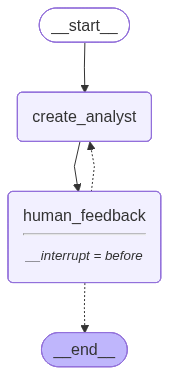

In [51]:
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [52]:
topic = "The benefits of adopting Langgraph as an agent Framework over Autogen"

In [53]:
max_analysts = 4
thread = {"configurable": {"thread_id": 1}}

In [59]:
for event in graph.stream({"topic":topic,
            "max_analysts":max_analysts},
            thread,
            stream_mode= "values"):
    analysts = event.get('analysts', '')

    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Role: {analyst.role}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Description: {analyst.description}")
            print("-" * 50)

Name: Dr. Rachel Kim
Role: AI Researcher
Affiliation: Stanford University
Description: Expert in natural language processing and agent frameworks, focusing on the benefits of Langgraph's flexibility and customizability
--------------------------------------------------
Name: Dr. Liam Chen
Role: Software Engineer
Affiliation: Google
Description: Specialist in developing conversational AI systems, concerned with the scalability and reliability of Autogen compared to Langgraph
--------------------------------------------------
Name: Dr. Ava Moreno
Role: Cognitive Scientist
Affiliation: MIT
Description: Researcher in human-computer interaction, interested in the potential of Langgraph to enhance user experience and interface design


--------------------------------------------------
Name: Dr. Julian Lee
Role: Tech Consultant
Affiliation: Deloitte
Description: Advisor on AI adoption and implementation, evaluating the cost-benefit analysis and feasibility of integrating Langgraph into existing infrastructure
--------------------------------------------------


HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


Name: Alex Chen
Role: Startup Founder
Affiliation: TechStars
Description: Focus on the benefits of adopting Langgraph for startup companies, particularly in terms of scalability and cost-effectiveness.
--------------------------------------------------
Name: Dr. Rachel Kim
Role: Enterprise Architect
Affiliation: Gartner
Description: Examine the latest enterprise applications of Langgraph and its potential to replace Autogen in large-scale industries.
--------------------------------------------------
Name: Mayank Singh
Role: Technical Lead
Affiliation: Microsoft
Description: Investigate the technical advantages of Langgraph over Autogen, including its performance, security, and integration capabilities.
--------------------------------------------------
Name: Emily Patel
Role: Innovation Consultant
Affiliation: Accenture
Description: Explore the innovative use cases of Langgraph in various industries, such as healthcare and finance, and its potential to drive digital transformation.
--

In [55]:
state = graph.get_state(thread)

In [56]:
state

StateSnapshot(values={'topic': 'The benefits of adopting Langgraph as an agent Framework over Autogen', 'max_analysts': 4, 'analysts': [Analyst(name='Dr. Rachel Kim', role='AI Researcher', affiliation='Stanford University', description="Expert in natural language processing and agent frameworks, focusing on the benefits of Langgraph's flexibility and customizability"), Analyst(name='Dr. Liam Chen', role='Software Engineer', affiliation='Google', description='Specialist in developing conversational AI systems, concerned with the scalability and reliability of Autogen compared to Langgraph'), Analyst(name='Dr. Ava Moreno', role='Cognitive Scientist', affiliation='MIT', description='Researcher in human-computer interaction, interested in the potential of Langgraph to enhance user experience and interface design'), Analyst(name='Dr. Julian Lee', role='Tech Consultant', affiliation='Deloitte', description='Advisor on AI adoption and implementation, evaluating the cost-benefit analysis and f

StateSnapshot(values={'topic': 'The benefits of adopting Langgraph as an agent Framework over Autogen', 'max_analysts': 4, 'analysts': [Analyst(name='Dr. Rachel Kim', role='AI Researcher', affiliation='Stanford University', description="Expert in natural language processing and agent frameworks, focusing on the benefits of Langgraph's flexibility and customizability"), Analyst(name='Dr. Liam Chen', role='Software Engineer', affiliation='Google', description='Specialist in developing conversational AI systems, concerned with the scalability and reliability of Autogen compared to Langgraph'), Analyst(name='Dr. Ava Moreno', role='Cognitive Scientist', affiliation='MIT', description='Researcher in human-computer interaction, interested in the potential of Langgraph to enhance user experience and interface design'), Analyst(name='Dr. Julian Lee', role='Tech Consultant', affiliation='Deloitte', description='Advisor on AI adoption and implementation, evaluating the cost-benefit analysis and feasibility of integrating Langgraph into existing infrastructure')]}, next=('human_feedback',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a7466-1dde-6f5a-8001-345c7c86d7e7'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-10-12T08:35:17.996937+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a7466-0f3c-66b0-8000-bde660c071ae'}}, tasks=(PregelTask(id='17f88063-513d-dfbe-1c61-5bd69f3f1838', name='human_feedback', path=('__pregel_pull', 'human_feedback'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [57]:
# Check attribute- next
state.next

('human_feedback',)

In [58]:
graph.update_state(thread,
                   {"human_analyst_feedback": "add some start up perspective and focus on latest enterprise application."}, as_node="human_feedback"
                   )

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0a765e-c11e-6d49-8002-8d3c40667c68'}}

In [60]:
# If we are satisfied, then we simply supply no feedback
further_feedback = ""

In [61]:
# 1) Get the latest state (you're paused at 'human_feedback')
state = graph.get_state(thread)

# 2) Use the exact config from that state (it already has thread_id, checkpoint_ns, checkpoint_id)
cfg = state.config

In [62]:
# 3) Update feedback at the 'human_feedback' node
#    Tip: if your TypedDict says `human_analyst_feedback: str`, prefer "" (empty string) over None
graph.update_state(cfg, {"human_analyst_feedback": ""}, as_node="human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0a773a-218b-6086-8006-b24b9d61eecd'}}

In [63]:
# 4) Verify it moved to END
final_state = graph.get_state(thread)
print(final_state.next) # should be (END,)

()


In [64]:
analysts = final_state.values.get("analysts")
analysts

[Analyst(name='Alex Chen', role='Startup Founder', affiliation='TechStars', description='Focus on the benefits of adopting Langgraph for startup companies, particularly in terms of scalability and cost-effectiveness.'),
 Analyst(name='Dr. Rachel Kim', role='Enterprise Architect', affiliation='Gartner', description='Examine the latest enterprise applications of Langgraph and its potential to replace Autogen in large-scale industries.'),
 Analyst(name='Mayank Singh', role='Technical Lead', affiliation='Microsoft', description='Investigate the technical advantages of Langgraph over Autogen, including its performance, security, and integration capabilities.'),
 Analyst(name='Emily Patel', role='Innovation Consultant', affiliation='Accenture', description='Explore the innovative use cases of Langgraph in various industries, such as healthcare and finance, and its potential to drive digital transformation.')]

In [65]:
for analyst in analysts:
    print(f"Name: {analyst.name}")
    print(f"Role: {analyst.role}")
    print(f"Affiliation: {analyst.affiliation}")
    print(f"Description: {analyst.description}")
    print("-" * 50)

Name: Alex Chen
Role: Startup Founder
Affiliation: TechStars
Description: Focus on the benefits of adopting Langgraph for startup companies, particularly in terms of scalability and cost-effectiveness.
--------------------------------------------------
Name: Dr. Rachel Kim
Role: Enterprise Architect
Affiliation: Gartner
Description: Examine the latest enterprise applications of Langgraph and its potential to replace Autogen in large-scale industries.
--------------------------------------------------
Name: Mayank Singh
Role: Technical Lead
Affiliation: Microsoft
Description: Investigate the technical advantages of Langgraph over Autogen, including its performance, security, and integration capabilities.
--------------------------------------------------
Name: Emily Patel
Role: Innovation Consultant
Affiliation: Accenture
Description: Explore the innovative use cases of Langgraph in various industries, such as healthcare and finance, and its potential to drive digital transformation.
--

In [ ]:
from langgraph.graph import StateGraph, END
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langgraph.checkpoint.memory import MemorySaver

In [66]:
from langchain_community.document_loaders import WikipediaLoader

docs = WikipediaLoader(query="LangGraph").load()
print(docs[0].page_content[:500])

LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.


== History ==
LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, 


In [67]:
docs = WikipediaLoader(query="The benefits of adopting AWS cloud").load()
print(docs[0].page_content[:500])

Cloud computing is "a paradigm for enabling network access to a scalable and elastic pool of shareable physical or virtual resources with self-service provisioning and administration on-demand," according to ISO. It is commonly referred to as "the cloud".


== Characteristics ==
In 2011, the National Institute of Standards and Technology (NIST) identified five "essential characteristics" for cloud systems. Below are the exact definitions according to NIST:

On-demand self-service: "A consumer ca


In [69]:
from langchain_community.utilities import WikipediaAPIWrapper
wiki = WikipediaAPIWrapper(doc_content_chars_max=4000)
docs = wiki.run("The benefits of adopting LangGraph as an agentic framework")
print(docs)

Page: Semantic Web
Summary: The Semantic Web, sometimes known as Web 3.0, is an extension of the World Wide Web through standards set by the World Wide Web Consortium (W3C). The goal of the Semantic Web is to make Internet data machine-readable.
To enable the encoding of semantics with the data, technologies such as Resource Description Framework (RDF) and Web Ontology Language (OWL) are used. These technologies are used to formally represent metadata. For example, ontology can describe concepts, relationships between entities, and categories of things. These embedded semantics offer significant advantages such as reasoning over data and operating with heterogeneous data sources.
These standards promote common data formats and exchange protocols on the Web, fundamentally the RDF. According to the W3C, "The Semantic Web provides a common framework that allows data to be shared and reused across application, enterprise, and community boundaries." The Semantic Web is therefore regarded as

#### Second Workflow

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [ ]:
from dotenv import load_dotenv
load_dotenv()  # take environment variables from .env.
import os
tavily_api_key = os.getenv("TAVILY_API_KEY")

In [ ]:
tavily_search = TavilySearchResults(tavily_api_key=tavily_api_key)
tavily_search.invoke("langgraph")

In [ ]:
from langchain_community.document_loaders import WikipediaLoader
docs = WikipediaLoader(query="LangGraph").load()
print(docs[0].page_content[:500])

In [ ]:
def search_web(state:InterviewState):
    """
    Retrieve data from the web
    """
    structure_llm = llm.with_structured_output(SearchQuery)